# 6.4 Machine Learning 

## Content of the script

### Importing Libraries and data

### Data Cleaning

### Data prep for regression analysis

### Regression analysis

## Importing Libraries and data

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [123]:
# This command tells python to remember a main folder path
path = r'/Users/obinwannealisigwe/Desktop/Advanced Analytics/Gun Violence/Data/Prepared Data'

In [124]:
# simplify the import function
data_cleaned = pd.read_csv(os.path.join(path, 'prepared.csv'), index_col = False)

## Data Cleaning

In [126]:
data_cleaned.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'address', 'n_killed', 'n_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'year'],
      dtype='object')

In [127]:
data_cleaned.head(20)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,year
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0.0,3.0,14.0,NaN,...,-79.8559,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.447132,20.47711,2013
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1.0,3.0,43.0,NaN,...,-118.3330,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.000000,35.00000,2013
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1.0,3.0,9.0,0::Unknown||1::Unknown,...,-82.1377,2.000000,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.000000,13.00000,2013
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,2.0,0.0,6.0,NaN,...,-104.8020,1.372442,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.000000,28.00000,2013
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2.0,2.0,6.0,0::Unknown||1::Unknown,...,-79.9569,2.000000,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.000000,27.00000,2013
5,5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,2.0,0.0,1.0,NaN,...,-95.9768,1.372442,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,72.000000,11.00000,2013
6,6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,2.0,0.0,1.0,0::Unknown||1::Unknown,...,-106.7160,2.000000,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.000000,14.00000,2013
7,7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0.0,3.0,2.0,NaN,...,-90.0836,1.372442,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,93.000000,5.00000,2013
8,8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0.0,3.0,9.0,NaN,...,-121.7180,1.372442,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,11.000000,7.00000,2013
9,9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1.0,3.0,7.0,NaN,...,-76.6412,1.372442,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.447132,44.00000,2013


In [128]:
data_cleaned.shape

(239677, 22)

### Missing values

In [130]:
# Check for missing values

data_cleaned.isnull().sum()

Unnamed: 0                     0
incident_id                    0
date                           0
state                          0
city_or_county                 0
address                    16497
n_killed                       0
n_injured                      0
congressional_district         0
gun_stolen                 99498
gun_type                  198630
latitude                       0
longitude                      0
n_guns_involved                0
participant_age            92298
participant_age_group      42119
participant_gender         36362
participant_status         27626
participant_type           24863
state_house_district           0
state_senate_district          0
year                           0
dtype: int64

### Drop 'participant_age'

In [132]:
# Drop the 'participant_column' from the data_cleaned DataFrame
data_cleaned = data_cleaned.drop(columns=['participant_age'])

# Display the first few rows of the updated DataFrame to confirm the column has been dropped
print(data_cleaned.head())

   Unnamed: 0  incident_id        date           state city_or_county  \
0           0       461105  2013-01-01    Pennsylvania     Mckeesport   
1           1       460726  2013-01-01      California      Hawthorne   
2           2       478855  2013-01-01            Ohio         Lorain   
3           3       478925  2013-01-05        Colorado         Aurora   
4           4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street       0.0        3.0   
1               13500 block of Cerise Avenue       1.0        3.0   
2                      1776 East 28th Street       1.0        3.0   
3           16000 block of East Ithaca Place       2.0        0.0   
4                  307 Mourning Dove Terrace       2.0        2.0   

   congressional_district              gun_stolen  ... latitude  longitude  \
0                    14.0                     NaN  ...  40.3467   -7

### Duplicate check

In [134]:
# Check for duplicates in the data_cleaned DataFrame
duplicates = data_cleaned.duplicated()

# Display the number of duplicate rows
print(f'Number of duplicate rows: {duplicates.sum()}')

# If you want to see which rows are duplicated
duplicate_rows = data_cleaned[duplicates]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Unnamed: 0, incident_id, date, state, city_or_county, address, n_killed, n_injured, congressional_district, gun_stolen, gun_type, latitude, longitude, n_guns_involved, participant_age_group, participant_gender, participant_status, participant_type, state_house_district, state_senate_district, year]
Index: []

[0 rows x 21 columns]


### Extreme values checks

/var/folders/ld/rygzx5nj4x3ddd2l1z5rj3m80000gn/T/ipykernel_71984/2791996983.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['n_killed'], bins=25) # Shows extreme values
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_killed', ylabel='Density'>

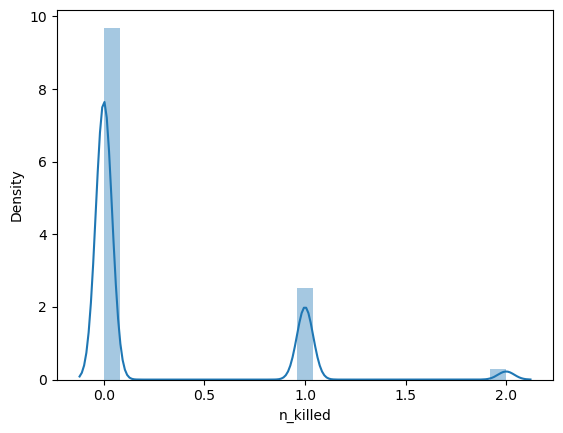

In [136]:
sns.distplot(data_cleaned['n_killed'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

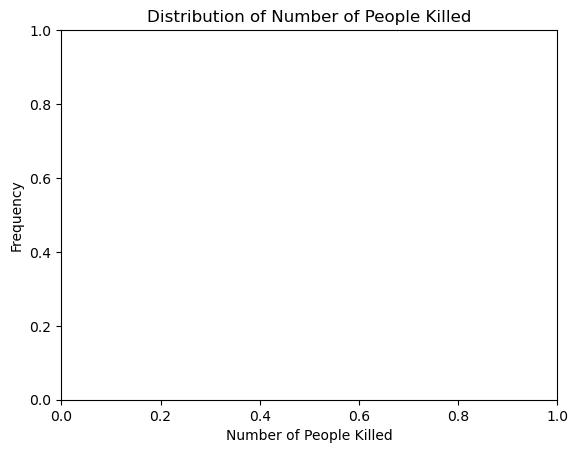

In [205]:
plt.title('Distribution of Number of People Killed')
plt.xlabel('Number of People Killed')
plt.ylabel('Frequency')
plt.show()

In [138]:
data_cleaned['n_killed'].mean() # Check the mean

0.24719935579968041

In [139]:
data_cleaned['n_killed'].median() # Check the mean

0.0

In [140]:
data_cleaned['n_killed'].max() # Check the mean

2.0

## Data prep for regression analysis

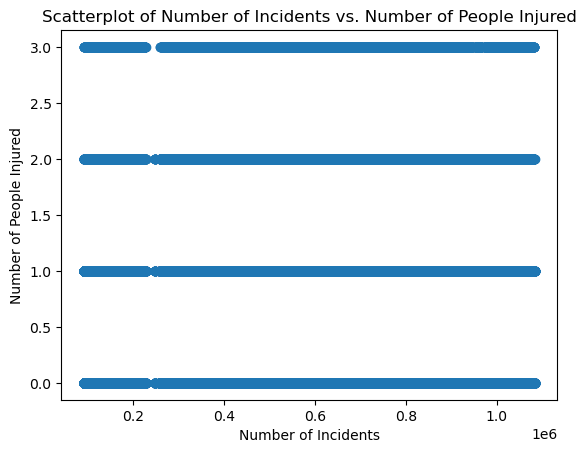

In [142]:
# Scatterplot of number of incidents vs. number of people injured
plt.scatter(data_cleaned['incident_id'], data_cleaned['n_injured'])
plt.xlabel('Number of Incidents')
plt.ylabel('Number of People Injured')
plt.title('Scatterplot of Number of Incidents vs. Number of People Injured')
plt.show()

In [143]:
# Reshape variables into NumPy arrays
X = np.array(data_cleaned['incident_id']).reshape(-1, 1)
y = np.array(data_cleaned['n_injured']).reshape(-1, 1)

In [144]:
X

array([[ 461105],
       [ 460726],
       [ 478855],
       ...,
       [1083151],
       [1082514],
       [1081940]])

In [145]:
y

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [0.],
       [0.]])

In [146]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regression Analysis

In [148]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [149]:
# Predict y values on the test set
y_pred = model.predict(X_test)

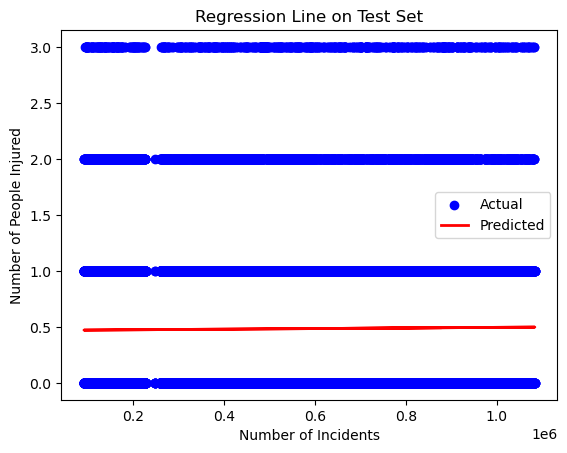

In [150]:
# Plot the regression line on the test set
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Number of Incidents')
plt.ylabel('Number of People Injured')
plt.title('Regression Line on Test Set')
plt.legend()
plt.show()

### Interpretation

#### The scatterplot and regression line show how well the linear regression model fits the test data. We can visually inspect if the predicted values (red line) follow the actual values (blue dots).

In [151]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_pred) # This is the mean squared error
r2 = r2_score(y_test, y_pred) # This is the R2 score. 

In [152]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.43877280283022485
R2 Score: 5.0153440271150096e-05


In [210]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_df.head())

   Actual  Predicted
0     1.0   0.492712
1     0.0   0.487713
2     1.0   0.489545
3     0.0   0.473810
4     0.0   0.480414


### Interpretation

#### Model Performance:

#### The Mean Squared Error (MSE) and R2 score provide a quantitative measure of the model's performance. A lower MSE indicates better fit, and an R2 score closer to 1 indicates that a large proportion of the variance in the dependent variable is predictable from the independent variable.

#### Possible Data Bias

##### One potential source of bias in this dataset could be underreporting of incidents or inaccuracies in the recorded data. Additionally, the relationship between incidents and injuries might be influenced by other factors not included in this analysis, such as the location, time of day, or type of incident. It's important to consider these factors when interpreting the model's performance and results.

##### By following these steps, we have performed a linear regression analysis on the gun violence data, explored the relationship between the number of incidents and the number of people injured, and evaluated the model's performance.

In [154]:
y_pred

array([[0.49271162],
       [0.48771298],
       [0.489545  ],
       ...,
       [0.49737856],
       [0.47345557],
       [0.48681246]])

In [155]:
# Create a dataframe comparing the actual and predicted values of y.

data_cleaned = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data_cleaned.head(30)

,Actual,Predicted
0,1.0,0.492712
1,0.0,0.487713
2,1.0,0.489545
3,0.0,0.473810
4,0.0,0.480414
5,0.0,0.480817
6,1.0,0.496643
7,0.0,0.495950
8,2.0,0.476675
9,1.0,0.471682


In [156]:
# Create and fit the regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

# Predict y values on the training set
y_predicted_train = regression.predict(X_train)

# Verify the shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_predicted_train: {y_predicted_train.shape}")

# Optionally, inspect a few predictions
print(y_predicted_train[:5])

Shape of X_train: (191741, 1)
Shape of y_train: (191741, 1)
Shape of y_predicted_train: (191741, 1)
[[0.48214093]
 [0.48906029]
 [0.49224196]
 [0.47949256]
 [0.48984078]]


In [157]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [158]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.69359419e-08]]
Mean squared error:  0.43862961320594235
R2 score:  0.0001420102890391517


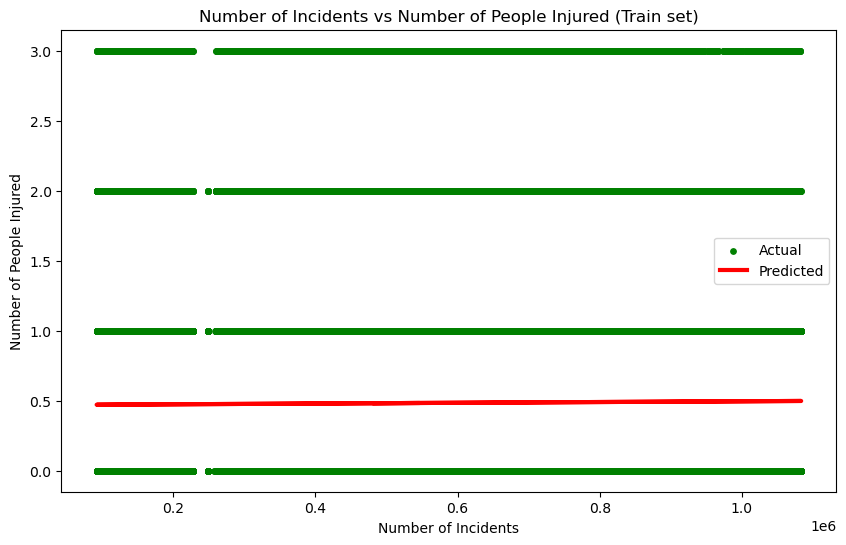

In [159]:
# Visualizing the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='green', s=15, label='Actual')
plt.plot(X_train, y_predicted_train, color='red', linewidth=3, label='Predicted')
plt.title('Number of Incidents vs Number of People Injured (Train set)')
plt.xlabel('Number of Incidents')
plt.ylabel('Number of People Injured')
plt.legend()
plt.show()

In [229]:
data_cleaned = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data_cleaned.head(30)

,Actual,Predicted
0,0.0,0.482141
1,1.0,0.489060
2,1.0,0.492242
3,1.0,0.479493
4,0.0,0.489841
5,0.0,0.487027
6,0.0,0.482681
7,0.0,0.471631
8,1.0,0.474358
9,0.0,0.475186
